In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [6]:
## centroid maker
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [3]:
## centroid function
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [8]:
## k means function
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [9]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    print('cov \n', cov)
    print()
    # perform SVD
    U, S, V = np.linalg.svd(cov) # singular value decomposition
    
    return U, S, V

In [10]:
def project_data(X, U, k):#
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [11]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [14]:
#load data

data = loadmat("G:\BRMAGA\maachine larning\ML\PCA\ex7data2.mat")
#print(data)
print(data['X'])
print(data['X'].shape)

[[ 1.84207953  4.6075716 ]
 [ 5.65858312  4.79996405]
 [ 6.35257892  3.2908545 ]
 [ 2.90401653  4.61220411]
 [ 3.23197916  4.93989405]
 [ 1.24792268  4.93267846]
 [ 1.97619886  4.43489674]
 [ 2.23454135  5.05547168]
 [ 2.98340757  4.84046406]
 [ 2.97970391  4.80671081]
 [ 2.11496411  5.37373587]
 [ 2.12169543  5.20854212]
 [ 1.5143529   4.77003303]
 [ 2.16979227  5.27435354]
 [ 0.41852373  4.88312522]
 [ 2.47053695  4.80418944]
 [ 4.06069132  4.99503862]
 [ 3.00708934  4.67897758]
 [ 0.66632346  4.87187949]
 [ 3.1621865   4.83658301]
 [ 0.51155258  4.91052923]
 [ 3.1342801   4.96178114]
 [ 2.04974595  5.6241395 ]
 [ 0.66582785  5.24399257]
 [ 1.01732013  4.84473647]
 [ 2.17893568  5.29758701]
 [ 2.85962615  5.26041997]
 [ 1.30882588  5.30158701]
 [ 0.99253246  5.01567424]
 [ 1.40372638  4.57527684]
 [ 2.66046572  5.19623848]
 [ 2.79995882  5.11526323]
 [ 2.06995345  4.6846713 ]
 [ 3.29765181  5.59205535]
 [ 1.8929766   4.89043209]
 [ 2.55983064  5.26397756]
 [ 1.15354031  4.67866717]
 

In [15]:
# classify points 
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
initial_centroids = np.array([[8, 0], [8, 6], [0, 3]])
initial_centroids =  init_centroids(X, 3)
print(initial_centroids )

[[3.95549912 0.83269299]
 [3.27844295 1.75043926]
 [6.17443157 3.29026488]]


In [16]:
idx = find_closest_centroids(X, initial_centroids)
print(idx)

[1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]


In [17]:
#calculate new centroid
c = compute_centroids(X, idx, 3)
print(c)

[[3.77136521 0.82174961]
 [2.17269155 3.42843061]
 [5.91844409 3.15793345]]


In [18]:
for x in range(6):
    # apply k means 
    idx, centroids = run_k_means(X, initial_centroids, x)
    print(idx)
    print()
    print(centroids )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[3.95549912 0.83269299]
 [3.27844295 1.75043926]
 [6.17443157 3.29026488]]
[1. 2. 2.

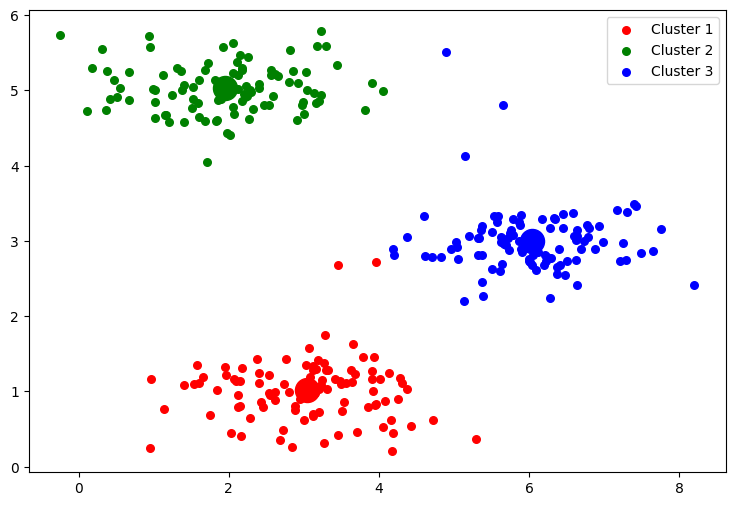

In [19]:
# draw it
def draw():
    cluster1 = X[np.where(idx == 0)[0],:]
    cluster2 = X[np.where(idx == 1)[0],:]
    cluster3 = X[np.where(idx == 2)[0],:]
    
    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
    ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')
    
    ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
    ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')
    
    ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
    ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')
    
    ax.legend()
    
draw()

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Nov 29 23:36:07 2011', '__version__': '1.0', '__globals__': [], 'A': array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  

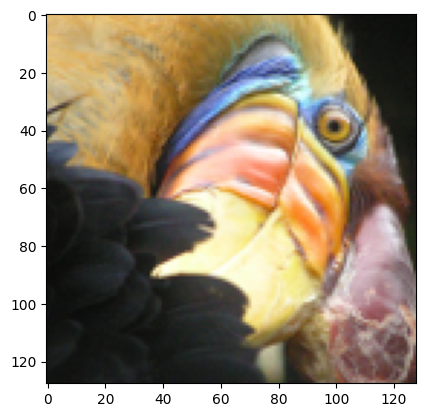

In [23]:
# we need to compress the image 
    
    
image_data = loadmat(r"G:\BRMAGA\maachine larning\ML\PCA\bird_small.mat")

print(image_data)

A = image_data['A']
print(A.shape)
plt.imshow(A)

# normalize value ranges
A = A / 255.


In [24]:
# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print(X.shape)

# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)
print(initial_centroids)

(16384, 3)
[[0.54117647 0.43137255 0.32156863]
 [0.59215686 0.4627451  0.20392157]
 [0.0627451  0.07058824 0.0627451 ]
 [0.14901961 0.14117647 0.09411765]
 [0.99215686 0.99607843 0.92156863]
 [0.75294118 0.6745098  0.41568627]
 [0.27058824 0.32156863 0.55294118]
 [0.97254902 0.94901961 0.64705882]
 [0.08627451 0.09019608 0.08235294]
 [0.8745098  0.78431373 0.40392157]
 [0.09411765 0.09803922 0.08627451]
 [0.69803922 0.70980392 0.73333333]
 [0.3372549  0.30196078 0.35294118]
 [0.41568627 0.25098039 0.18431373]
 [0.87058824 0.75686275 0.43921569]
 [0.05882353 0.06666667 0.05490196]]


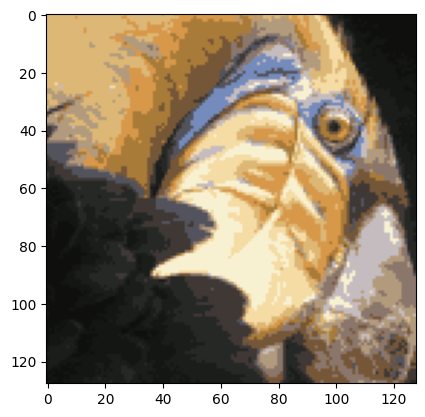

In [25]:
## run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

## get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

## map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

## reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)

(50, 2)
[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]
 [3.89067196 6.48838087]
 [3.47580524 3.63284876]
 [5.91129845 6.68076853]
 [3.92889397 5.09844661]
 [4.56183537 5.62329929]
 [4.57407171 5.39765069]
 [4.37173356 5.46116549]
 [4.19169388 4.95469359]
 [5.24408518 4.66148767]
 [2.8358402  3.76801716]
 [5.63526969 6.31211438]
 [4.68632968 5.6652411 ]
 [2.85051337 4.62645627]
 [5.1101573  7.36319662]
 [5.18256377 4.64650909]
 [5.70732809 6.68103995]
 [3.57968458 4.80278074]
 [5.63937773 6.12043594]
 [4.26346851 4.68942896]
 [2.53651693 3.88449078]
 [3.22382902 4.94255585]
 [4.92948801 5.95501971]
 [5.79295774 5.10839305]
 [2.81684824 4.81895769]
 [3.88882414 5.10036564]
 [3.34323419 5.89301345]
 [5.87973414 5.52141664]
 [3.10391912 3.85710242]
 [5.33150572 4.68074235]
 [3.37542687 4.56537852]
 [4.77667888 6.25435039]
 [2.6757463  3.73096988]
 [5.50027665 5.67948113]
 [1.79709714 3.24753885]
 [4.3225147  5.11

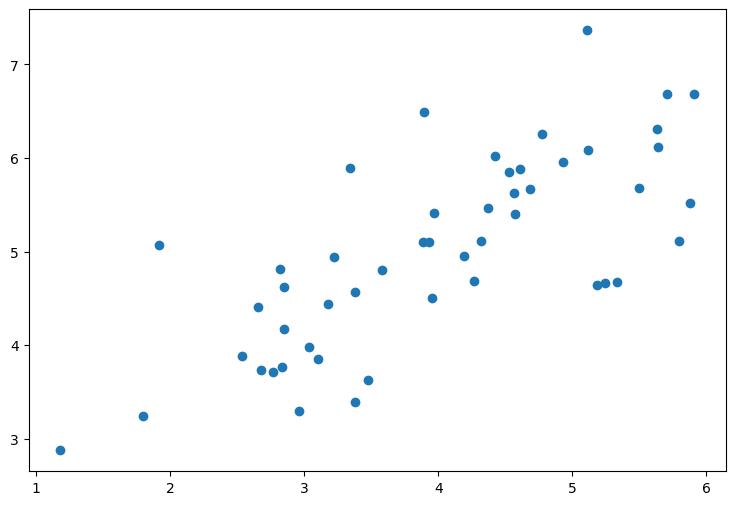

In [26]:
data = loadmat("G:\BRMAGA\maachine larning\ML\PCA\ex7data1.mat")
X = data['X']
print(X.shape)
print(X)
print()

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:, 0], X[:, 1])

In [27]:
U, S, V = pca(X)
print(U)
print()
print(S)
print()
print(V)

cov 
 [[1.11151143 0.4213388 ]
 [0.4213388  0.88848857]]

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]

[1.43584536 0.56415464]

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]


In [28]:
Z = project_data(X, U, 1)
print(Z)

[[-4.74689738]
 [-7.15889408]
 [-4.79563345]
 [-4.45754509]
 [-4.80263579]
 [-7.04081342]
 [-4.97025076]
 [-8.75934561]
 [-6.2232703 ]
 [-7.04497331]
 [-6.91702866]
 [-6.79543508]
 [-6.3438312 ]
 [-6.99891495]
 [-4.54558119]
 [-8.31574426]
 [-7.16920841]
 [-5.08083842]
 [-8.54077427]
 [-6.94102769]
 [-8.5978815 ]
 [-5.76620067]
 [-8.2020797 ]
 [-6.23890078]
 [-4.37943868]
 [-5.56947441]
 [-7.53865023]
 [-7.70645413]
 [-5.17158343]
 [-6.19268884]
 [-6.24385246]
 [-8.02715303]
 [-4.81235176]
 [-7.07993347]
 [-5.45953289]
 [-7.60014707]
 [-4.39612191]
 [-7.82288033]
 [-3.40498213]
 [-6.54290343]
 [-7.17879573]
 [-5.22572421]
 [-4.83081168]
 [-7.23907851]
 [-4.36164051]
 [-6.44590096]
 [-2.69118076]
 [-4.61386195]
 [-5.88236227]
 [-7.76732508]]


In [29]:
X_recovered = recover_data(Z, U, 1)
print(X_recovered)
print(X_recovered.shape)

[[3.76152442 2.89550838]
 [5.67283275 4.36677606]
 [3.80014373 2.92523637]
 [3.53223661 2.71900952]
 [3.80569251 2.92950765]
 [5.57926356 4.29474931]
 [3.93851354 3.03174929]
 [6.94105849 5.3430181 ]
 [4.93142811 3.79606507]
 [5.58255993 4.29728676]
 [5.48117436 4.21924319]
 [5.38482148 4.14507365]
 [5.02696267 3.8696047 ]
 [5.54606249 4.26919213]
 [3.60199795 2.77270971]
 [6.58954104 5.07243054]
 [5.681006   4.37306758]
 [4.02614513 3.09920545]
 [6.76785875 5.20969415]
 [5.50019161 4.2338821 ]
 [6.81311151 5.24452836]
 [4.56923815 3.51726213]
 [6.49947125 5.00309752]
 [4.94381398 3.80559934]
 [3.47034372 2.67136624]
 [4.41334883 3.39726321]
 [5.97375815 4.59841938]
 [6.10672889 4.70077626]
 [4.09805306 3.15455801]
 [4.90719483 3.77741101]
 [4.94773778 3.80861976]
 [6.36085631 4.8963959 ]
 [3.81339161 2.93543419]
 [5.61026298 4.31861173]
 [4.32622924 3.33020118]
 [6.02248932 4.63593118]
 [3.48356381 2.68154267]
 [6.19898705 4.77179382]
 [2.69816733 2.07696807]
 [5.18471099 3.99103461]


(5000, 1024)


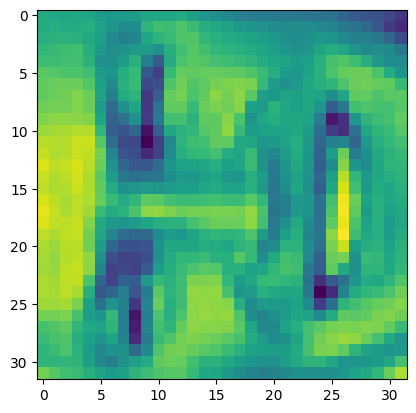

In [30]:
#Apply PCA on faces

faces = loadmat("G:\BRMAGA\maachine larning\ML\PCA\ex7faces.mat")
X = faces['X']
print(X.shape)
plt.imshow(X)


#show one face
face = np.reshape(X[41,:], (32, 32))
plt.imshow(face)

cov 
 [[1.57702283 1.51649405 1.41492652 ... 0.34969495 0.38232728 0.40044905]
 [1.51649405 1.51553873 1.44664108 ... 0.33710223 0.36960777 0.3865135 ]
 [1.41492652 1.44664108 1.44721143 ... 0.31888614 0.35201413 0.36938163]
 ...
 [0.34969495 0.33710223 0.31888614 ... 1.9690751  1.97195118 1.90097112]
 [0.38232728 0.36960777 0.35201413 ... 1.97195118 2.09255936 2.08177337]
 [0.40044905 0.3865135  0.36938163 ... 1.90097112 2.08177337 2.18494765]]



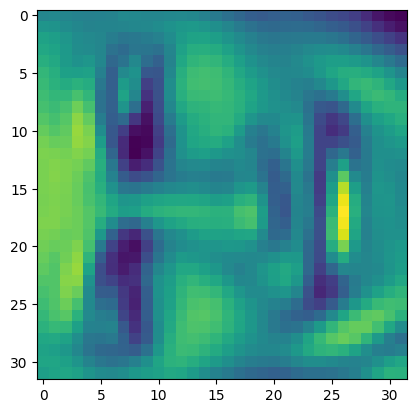

In [31]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[41,:], (32, 32))
plt.imshow(face)